In [81]:
import pulp
import itertools 
import math

Maths

In [ ]:
# Créer un problème de maximisation
prob = pulp.LpProblem("Problème de maximisation", pulp.LpMaximize)

# Définir les variables de décision
x = pulp.LpVariable("x", lowBound=0)
y = pulp.LpVariable("y", lowBound=2)

# Définir la fonction objectif
prob += 3*x + 5*y

# Ajouter les contraintes
prob += x + 2*y <= 10

# Résoudre le problème
prob.solve()

# Afficher les résultats
print("Statut:", pulp.LpStatus[prob.status])
print("Valeur optimale de x:", pulp.value(x))
print("Valeur optimale de y:", pulp.value(y))
print("Valeur optimale de la fonction objectif:", pulp.value(prob.objective))


Sac à dos

In [78]:
# Données du problème
poids = [2, 3, 4, 5, 9, 1, 3]
valeurs = [10, 20, 15, 25, 3, 20, 5]
poids_max = 7

# Créer un problème de maximisation
prob = pulp.LpProblem("Problème du sac à dos", pulp.LpMaximize)

# Variables binaires pour les objets
objets = range(len(poids))
selection = pulp.LpVariable.dicts("selection", objets, cat="Binary")

# Définir la fonction objectif
prob += pulp.lpSum([valeurs[i] * selection[i] for i in objets])

# Ajouter la contrainte de poids
prob += pulp.lpSum([poids[i] * selection[i] for i in objets]) <= poids_max

# Résoudre le problème
prob.solve()

# Afficher les résultats
print("Statut:", pulp.LpStatus[prob.status])
print("Objets sélectionnés:")
for i in objets:
    if selection[i].value() == 1.0:
        print("Objet", i, "- Poids:", poids[i], "Valeur:", valeurs[i])
print("Valeur totale:", pulp.value(prob.objective))


Statut: Optimal
Objets sélectionnés:
Objet 0 - Poids: 2 Valeur: 10
Objet 1 - Poids: 3 Valeur: 20
Objet 5 - Poids: 1 Valeur: 20
Valeur totale: 50.0


C:\Users\alexa\algo_env\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


TSP

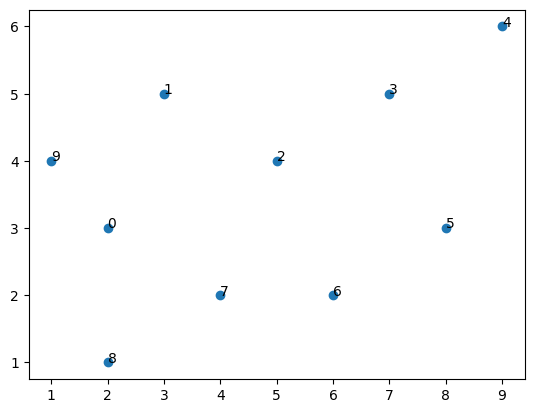

Status: Optimal
Total distance traveled: 21.992899087540213
Route:
0 -> 9
9 -> 1
1 -> 2
2 -> 3
3 -> 4
4 -> 5
5 -> 6
6 -> 7
7 -> 8
8 -> 0


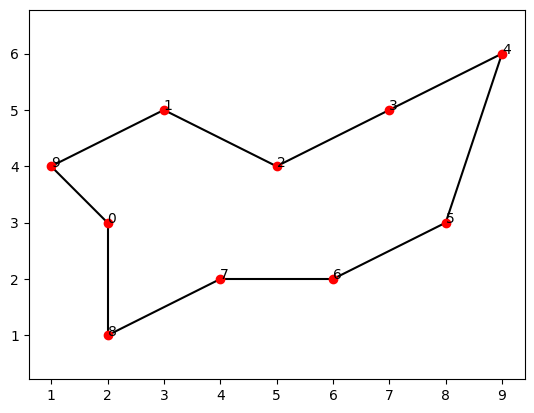

In [83]:
city_coords = {
    0: (2, 3),
    1: (3, 5),
    2: (5, 4),
    3: (7, 5),
    4: (9, 6),
    5: (8, 3),
    6: (6, 2),
    7: (4, 2),
    8: (2, 1),
    9: (1, 4)
}
import matplotlib.pyplot as plt 

# Define the number of cities
num_cities = len(city_coords)

# Plot the cities on a 2D plane
x_coords = [city_coords[i][0] for i in range(num_cities)]
y_coords = [city_coords[i][1] for i in range(num_cities)]
plt.scatter(x_coords, y_coords)


for i in range(num_cities):
    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.show()


def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

# Define the TSP problem
prob = pulp.LpProblem("TSP", pulp.LpMinimize)

# Define the binary decision variables
x = pulp.LpVariable.dicts("x", [(i, j) for i in city_coords for j in city_coords if i != j], cat='Binary') 

# Define the objective function
prob += pulp.lpSum([distance(city_coords[i], city_coords[j]) * x[(i, j)] for i in city_coords for j in city_coords if i != j])

# Define the constraints
# Each city must be visited exactly once
for i in city_coords:
    prob += pulp.lpSum([x[(i, j)] for j in city_coords if i != j]) == 1
    prob += pulp.lpSum([x[(j, i)] for j in city_coords if i != j]) == 1

# Subtour elimination constraints
for k in city_coords:
    for S in range(2, len(city_coords)):
        for subset in itertools.combinations([i for i in city_coords if i != k], S):
            prob += pulp.lpSum([x[(i, j)] for i in subset for j in subset if i != j]) <= len(subset) - 1

# Solve the problem using the CBC solver
prob.solve(pulp.PULP_CBC_CMD())

# Print the status of the solution
print("Status:", pulp.LpStatus[prob.status])

# Print the optimal objective value
print("Total distance traveled:", pulp.value(prob.objective)) 

# Extract the solution 
solution = []
start_city = 0
next_city = start_city
while True:
    for j in range(num_cities):
        if j != next_city and x[(next_city, j)].value() == 1:
            solution.append((next_city, j))
            next_city = j
            break
    if next_city == start_city:
        break

# Print the solution
print("Route:")
for i in range(len(solution)):
    print(str(solution[i][0]) + " -> " + str(solution[i][1]))

# Plot the solution on a 2D plane
for i in range(len(solution)):
    plt.plot([city_coords[solution[i][0]][0], city_coords[solution[i][1]][0]], [city_coords[solution[i][0]][1], city_coords[solution[i][1]][1]], 'k-')
for i in range(num_cities):
    plt.plot(city_coords[i][0], city_coords[i][1], 'ro')

    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.axis('equal')
plt.show()